In [1]:
import os
import sys
from datetime import datetime
import matplotlib.pyplot as plt

In [16]:
# Create list of depths

import random
random.seed(1502)
depths = [int(random.gauss(225, 27.5)) for i in range(1000000)]
with open('depths.txt', 'w') as f:
    f.write('\n'.join([str(i) for i in depths]))

In [22]:
with open('depths.txt', 'r') as f:
    depths = [int(i) for i in f.read().split('\n')]

In [3]:
# BASE VERSION - PYTHON ONLY

# Delete any old cython stuff
os.system('rm -fR build/ *.c *.pyd *.html')

# Re-import solution module
if sys.modules.get('solution'):
    del(sys.modules['solution'])
import solution

Overall mean: 0.036804 seconds
Mid 90% mean: 0.036754 seconds
Median: 0.036671 seconds


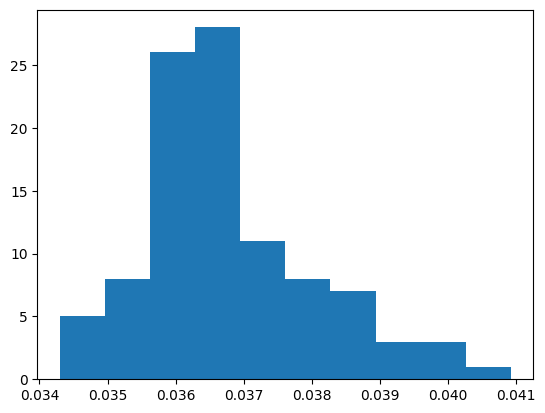

In [4]:
# Measure average execution time - BASIC .PY MODULE
n = 100
runtimes = []
for i in range(n):
    timepre = datetime.now()
    _ = solution.count_increases(depths)
    runtimes += [(datetime.now() - timepre).total_seconds()]

print(f'Overall mean: {sum(runtimes) / n:.6f} seconds')
print(f'Mid 90% mean: {sum(sorted(runtimes)[int(n*0.05): int(n*0.95)]) / (0.9*n):.6f} seconds')
print(f'Median: {sum(sorted(runtimes)[int(n/2-1): int(n/2+1)]) / 2:.6f} seconds')

plt.hist(runtimes, bins=10)
plt.show()

In [5]:
# COMPILE FUNCTION CODE AS C/C++

# Create solution.pyx - copy of solution.py
os.system('cp solution.py solution.pyx')

# Create setup.py
txt = """from distutils.core import setup
from Cython.Build import cythonize
import Cython.Compiler.Options

Cython.Compiler.Options.annotate = True

setup(
    ext_modules=cythonize(
        'solution.pyx', 
        compiler_directives={'language_level': '3'},
        annotate=True
    )
)
"""
with open('setup.py', 'w') as f:
    f.write(txt)

# Delete any old cython stuff, compile
os.system('rm -fR build/ *.c *.pyd *.html')
os.system('python setup.py build_ext --inplace --force')

# Re-import solution module
if sys.modules.get('solution'):
    del(sys.modules['solution'])
import solution

Overall mean: 0.027074 seconds
Mid 90% mean: 0.026929 seconds
Median: 0.026845 seconds


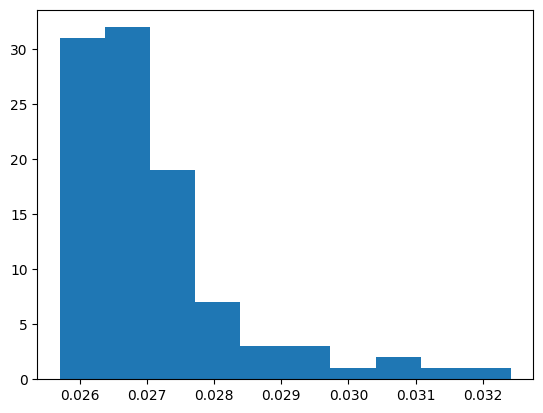

In [6]:
# Measure average execution time - COMPILED .PYX MODULE
n = 100
runtimes = []
for i in range(n):
    timepre = datetime.now()
    _ = solution.count_increases(depths)
    runtimes += [(datetime.now() - timepre).total_seconds()]

print(f'Overall mean: {sum(runtimes) / n:.6f} seconds')
print(f'Mid 90% mean: {sum(sorted(runtimes)[int(n*0.05): int(n*0.95)]) / (0.9*n):.6f} seconds')
print(f'Median: {sum(sorted(runtimes)[int(n/2-1): int(n/2+1)]) / 2:.6f} seconds')

plt.hist(runtimes, bins=10)
plt.show()

In [7]:
# ADD C TYPES TO FUNCTION CODE

# Update solution.pyx with C types, function defs
txt = """cpdef int count_increases(list depths):
    cdef int increase_counter, current_depth, depth
    current_depth = depths[0]
    increase_counter = 0
    for depth in depths[1:]:
        if depth > current_depth:
            increase_counter += 1
        current_depth = depth
    return increase_counter
"""
with open('solution.pyx', 'w') as f:
    f.write(txt)

# Delete any old cython stuff, compile
os.system('rm -fR build/ *.c *.pyd *.html')
os.system('python setup.py build_ext --inplace --force')

# Re-import solution module
if sys.modules.get('solution'):
    del(sys.modules['solution'])
import solution

Overall mean: 0.026813 seconds
Mid 90% mean: 0.026509 seconds
Median: 0.026368 seconds


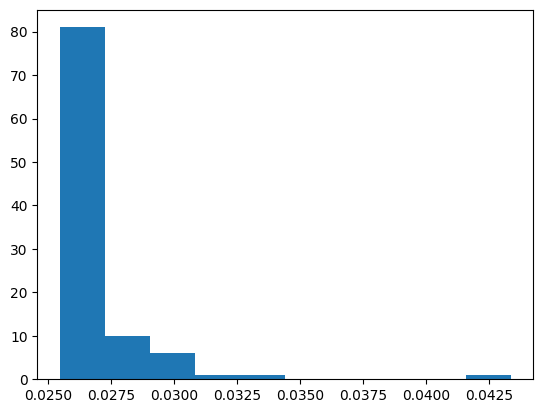

In [8]:
# Measure average execution time - COMPILED .PYX MODULE, C VARIABLE TYPES
n = 100
runtimes = []
for i in range(n):
    timepre = datetime.now()
    _ = solution.count_increases(depths)
    runtimes += [(datetime.now() - timepre).total_seconds()]

print(f'Overall mean: {sum(runtimes) / n:.6f} seconds')
print(f'Mid 90% mean: {sum(sorted(runtimes)[int(n*0.05): int(n*0.95)]) / (0.9*n):.6f} seconds')
print(f'Median: {sum(sorted(runtimes)[int(n/2-1): int(n/2+1)]) / 2:.6f} seconds')

plt.hist(runtimes, bins=10)
plt.show()

In [9]:
# ADD NUMPY

# Update setup.py
txt = """from distutils.core import setup
from Cython.Build import cythonize
import Cython.Compiler.Options
import numpy as np

Cython.Compiler.Options.annotate = True

setup(
    ext_modules=cythonize(
        'solution.pyx', 
        compiler_directives={'language_level': '3'},
        annotate=True
    ),
include_dirs=[np.get_include()]
)
"""
with open('setup.py', 'w') as f:
    f.write(txt)

# Update solution.pyx
txt = """cpdef int count_increases(int[:] depths):
    cdef int increase_counter, current_depth, depth, length, i
    length = depths.shape[0]
    current_depth = depths[0]
    increase_counter = 0
    for i in range(1, length):
        if depths[i] > current_depth:
            increase_counter += 1
        current_depth = depths[i]
    return increase_counter
"""
with open('solution.pyx', 'w') as f:
    f.write(txt)

# Delete any old cython stuff, compile
os.system('rm -fR build/ *.c *.pyd *.html')
os.system('python setup.py build_ext --inplace --force')

# Re-import solution module
if sys.modules.get('solution'):
    del(sys.modules['solution'])
import solution

Overall mean: 0.026091 seconds
Mid 90% mean: 0.025837 seconds
Median: 0.025712 seconds


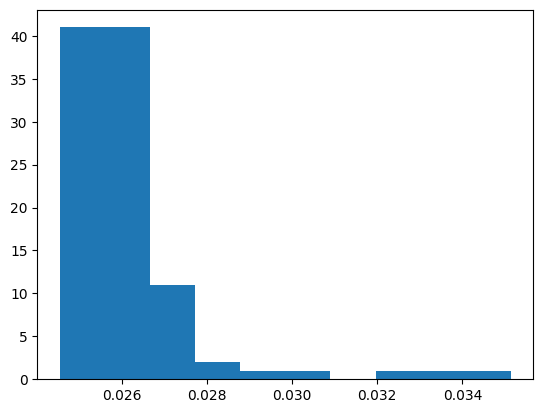

In [10]:
# Measure average execution time - COMPILED .PYX MODULE, C VARIABLE TYPES, NUMPY
n = 100
runtimes = []
for i in range(n):
    timepre = datetime.now()
    _ = solution.count_increases(depths)
    runtimes += [(datetime.now() - timepre).total_seconds()]

print(f'Overall mean: {sum(runtimes) / n:.6f} seconds')
print(f'Mid 90% mean: {sum(sorted(runtimes)[int(n*0.05): int(n*0.95)]) / (0.9*n):.6f} seconds')
print(f'Median: {sum(sorted(runtimes)[int(n/2-1): int(n/2+1)]) / 2:.6f} seconds')

plt.hist(runtimes, bins=10)
plt.show()